In [1]:
import sys
sys.path.append('../build')
import IPSModule as ips
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import lattpy as lp

1.122462048309373


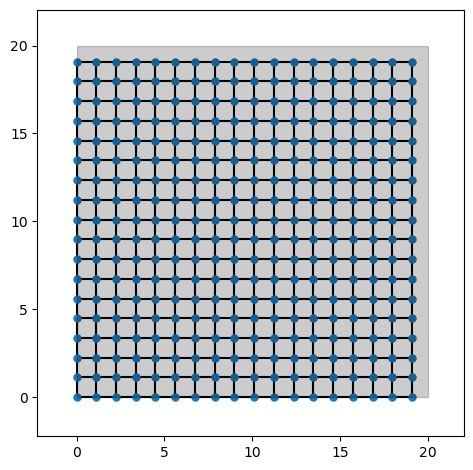

In [2]:
gamma = 1
temperature = 0.5
rad = 15.0

epsilon = 1.0
sigma = 1.0

init_dis = 2 ** (1.0 / 6.0) * sigma
np.random.seed(42)  # for reproducibility
print(init_dis)

# generate the initial configuration
_dis = init_dis
latt = lp.Lattice.square(a = _dis)
latt.add_atom()
latt.add_connections()
# s = lp.Circle((0, 0), radius=6)
# s = lp.Donut((0, 0), radius_outer = 6, radius_inner = 3)
s = lp.Shape((20, 20))
latt.build(shape = s, primitive=True)
ax = latt.plot()
s.plot(ax)
plt.show()

num_particles = latt.data.positions.shape[0]
init_particles_positions = latt.data.positions
p = ips.LangevinSystem(num_particles, gamma, temperature)

for i in range(num_particles):
    for d in range(2):
        p.get_positions()[d][i] = init_particles_positions[i][d] - 10
        p.get_velocities()[d][i] = 0.0

pair_force_config = {
    "type": "LennardJones",
    "eps": epsilon,
    "sigma": sigma
}

confinement_config = {
    "type": "Radial",
    "rad": rad
}
simulator = ips.IPS_Simulator_Langevin(p)
simulator.init(pair_force_config, confinement_config)

In [3]:
from utils import SimulationVisualizer

num_frames = 10
num_step = 30000
sim_visualizer = SimulationVisualizer(simulator=simulator, particle_system=p, rad = rad, draw_interval=num_step // num_frames, dt = 0.001)

html = sim_visualizer.run_animation(num_step)
display(html)
# sim_visualizer.run_animation_to_gif(num_step, "test1.gif")